<a href="https://colab.research.google.com/github/boscherj/LearningNodeJS/blob/master/escarpins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!mkdir escarpins
!mkdir escarpins/Chanel
!mkdir escarpins/Dior
!mkdir escarpins/Louboutin
!mkdir escarpins/Lvmh

mkdir: cannot create directory ‘escarpins’: File exists
mkdir: cannot create directory ‘escarpins/Chanel’: File exists
mkdir: cannot create directory ‘escarpins/Dior’: File exists
mkdir: cannot create directory ‘escarpins/Louboutin’: File exists
mkdir: cannot create directory ‘escarpins/Lvmh’: File exists


In [61]:
!ls

escarpins  sample_data


In [4]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving chanel.csv to chanel.csv
Saving dior.csv to dior.csv
Saving louboutin.csv to louboutin.csv
Saving lvmh.csv to lvmh.csv
User uploaded file "chanel.csv" with length 33611 bytes
User uploaded file "dior.csv" with length 45870 bytes
User uploaded file "louboutin.csv" with length 43658 bytes
User uploaded file "lvmh.csv" with length 41628 bytes


In [5]:
!ls

chanel.csv  dior.csv  escarpins  louboutin.csv	lvmh.csv  sample_data


In [6]:
!mv chanel.csv escarpins
!mv dior.csv escarpins
!mv louboutin.csv escarpins
!mv lvmh.csv escarpins
!ls escarpins

Chanel	chanel.csv  Dior  dior.csv  Louboutin  louboutin.csv  Lvmh  lvmh.csv


In [0]:
from fastai.vision import *
# On recommence ça 4 fois, avec chaque lot d'images
folder = 'Lvmh'
file = 'lvmh.csv'
path = Path('escarpins')
dest = path/folder

In [16]:
download_images(path/file, dest, max_pics=200)

Error https://mfcdn.de/product/300x800/louis-vuitton-oh-really-pumps-f4eb0f.jpeg ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
Error https://www.tennisbox.fr/image/cache/Porte%20Chequier%20Louis%20Vuitton%20Blanc%20Escarpins-500x500.jpg HTTPSConnectionPool(host='www.tennisbox.fr', port=443): Max retries exceeded with url: /image/cache/Porte%20Chequier%20Louis%20Vuitton%20Blanc%20Escarpins-500x500.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f5e16fa8dd8>: Failed to establish a new connection: [Errno -2] Name or service not known',))
Error https://mfcdn.de/product/300x800/louis-vuitton-riemchenpumps-schwarz-elegant-55d09b.jpeg ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
Error http://www.louisvuittonssolde.fr/images/LV16/escarpins-louis-vuitton-p-5879995.jpg HTTPConnectionPool(host='www.louisvuittonssolde.fr', port=80): Max retries exceeded with 

In [0]:
classes = ['Chanel','Dior','Louboutin','Lvmh']

In [62]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Chanel


Dior


Louboutin


Lvmh


In [0]:
## ImageDataBunch
# num_workers est le nombre de CPU à utiliser



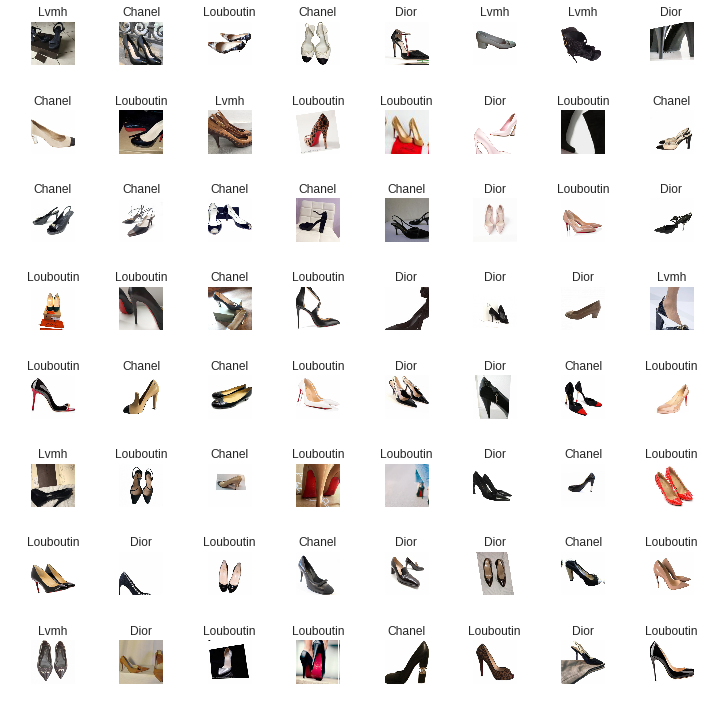

In [64]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
data.show_batch(rows=15, figsize=(10,10))

In [76]:
data.stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [77]:
# Les classes, le nombre de classes, la taille du training set, la taille du validation set
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Chanel', 'Dior', 'Louboutin', 'Lvmh'], 4, 618, 1)

In [91]:
len(data.valid_ds.x.items[:])

154

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [52]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.712605,1.447066,0.703947,00:13
1,1.515815,1.136899,0.500000,00:13
2,1.319278,1.068356,0.407895,00:13
3,1.172909,1.026887,0.381579,00:13
4,1.034510,1.023583,0.361842,00:13
5,0.928351,1.016267,0.381579,00:13
6,0.834120,1.009810,0.361842,00:13
7,0.761080,1.012663,0.361842,00:13
8,0.704913,1.014041,0.361842,00:13
9,0.661899,1.011067,0.361842,00:13


In [0]:
learn.unfreeze()

In [54]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


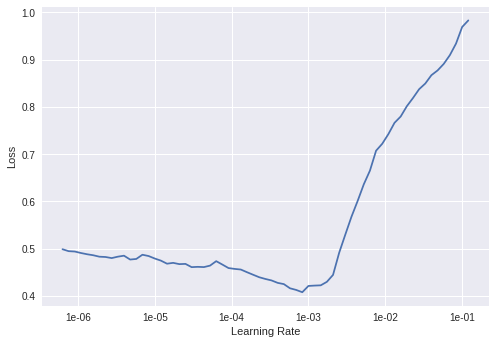

In [55]:
learn.recorder.plot()

In [56]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.849559,4.346684,0.690789,00:13
1,0.865392,1.944740,0.506579,00:14


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [1]:
interp.plot_confusion_matrix()

NameError: ignored

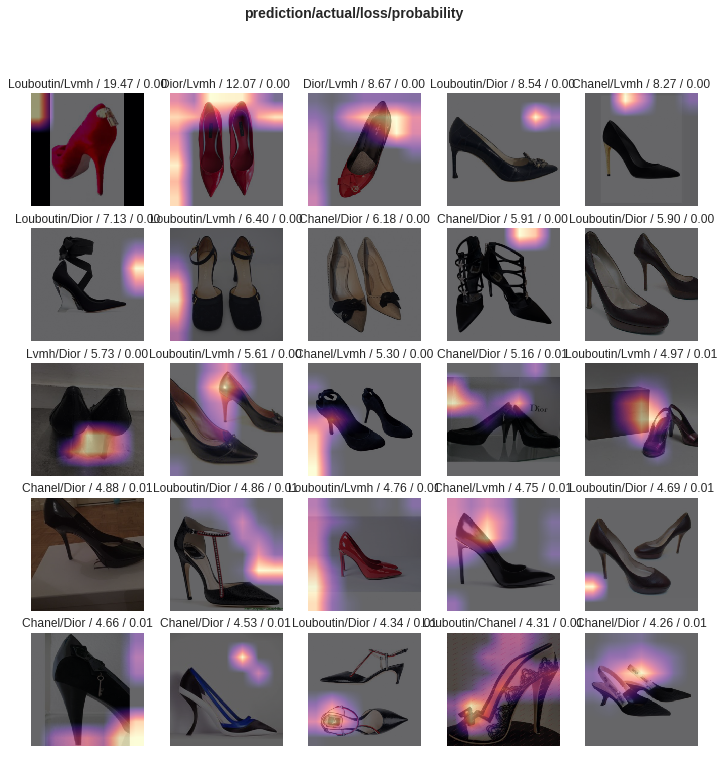

In [61]:
interp.plot_top_losses(25)

In [62]:
interp.most_confused()

[('Dior', 'Chanel', 17),
 ('Lvmh', 'Chanel', 12),
 ('Dior', 'Louboutin', 11),
 ('Lvmh', 'Louboutin', 10),
 ('Chanel', 'Louboutin', 9),
 ('Dior', 'Lvmh', 7),
 ('Lvmh', 'Dior', 5),
 ('Louboutin', 'Chanel', 3),
 ('Chanel', 'Lvmh', 2),
 ('Louboutin', 'Dior', 1)]

In [0]:
from fastai.widgets import *

In [0]:
ds, idxs = interp.top_losses()

In [0]:
top_loss_paths=data.valid_ds.x[idxs]

In [66]:
top_loss_paths.split_by_list

<bound method ItemList.split_by_list of ImageList (152 items)
Image (3, 316, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 333, 500)
Path: escarpins>

In [67]:
idxs

tensor([ 87,  25,  66,  80, 145, 102,  79, 107,  65,  64,  50,  29, 123,   5,
        140,  69,  78, 138, 109,  22,  23,  96,  55, 128,  54,  95,   6,   3,
         47,  93,  82,  60, 146, 105,  53, 121, 131,  32, 104,  27,   1, 130,
        106, 126,  20,   2,  59,  73, 120, 113,  10, 115,  28, 133,   0,  56,
         83,  43,  40,  24, 110,  49,   4,  52, 144,  61,  94,  34, 137,  71,
         74,  89, 151,  99, 111, 143, 100,  44,  11,  76,  37,  91,  46,  30,
         45, 129,  81, 132, 118,   9,  70,  38,  92,  35, 116,  12,  62,  17,
         33, 147, 149, 124, 108,  16, 127,  15,  57, 125,  97, 148,  18,  75,
         13,  36,  21,  88,  77, 117,  41,  67, 142,  39,  63,   7,   8, 150,
         51,  48, 136,  14, 119,  84,  86, 134,  85,  72, 103, 114,  68,  19,
         98,  90,  58, 135, 101,  31,  42, 141, 122, 112,  26, 139])

In [0]:
img = learn.data.valid_ds[80][0]

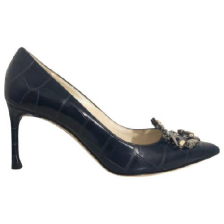

In [77]:
img

In [78]:
learn.predict(img)

(Category Louboutin,
 tensor(2),
 tensor([2.6580e-01, 1.9639e-04, 7.3347e-01, 5.3416e-04]))

In [0]:
interp.top_losses()

(tensor([1.1598e+01, 1.0526e+01, 1.0513e+01, 9.7580e+00, 9.5962e+00, 9.4118e+00,
         9.1059e+00, 8.7684e+00, 8.6042e+00, 8.1322e+00, 7.3150e+00, 7.2601e+00,
         6.9953e+00, 6.9953e+00, 6.7781e+00, 6.5738e+00, 6.5716e+00, 6.1978e+00,
         5.9363e+00, 5.8617e+00, 5.6620e+00, 5.6282e+00, 5.4175e+00, 5.1557e+00,
         5.1381e+00, 5.1306e+00, 4.8999e+00, 4.7135e+00, 4.5588e+00, 4.5130e+00,
         4.5017e+00, 4.3814e+00, 4.2571e+00, 4.1398e+00, 4.1214e+00, 4.1087e+00,
         4.0662e+00, 4.0390e+00, 4.0121e+00, 3.7564e+00, 3.4664e+00, 3.4434e+00,
         3.4353e+00, 3.4101e+00, 2.8155e+00, 2.7623e+00, 2.7067e+00, 2.6116e+00,
         2.5893e+00, 2.5406e+00, 2.4700e+00, 2.4090e+00, 2.2341e+00, 2.0148e+00,
         1.9501e+00, 1.9023e+00, 1.8172e+00, 1.7773e+00, 1.6814e+00, 1.6597e+00,
         1.6272e+00, 1.5470e+00, 1.4923e+00, 1.4875e+00, 1.3918e+00, 1.3918e+00,
         1.3685e+00, 1.3087e+00, 1.2950e+00, 1.1557e+00, 1.0389e+00, 1.0291e+00,
         1.0038e+00, 9.3960e

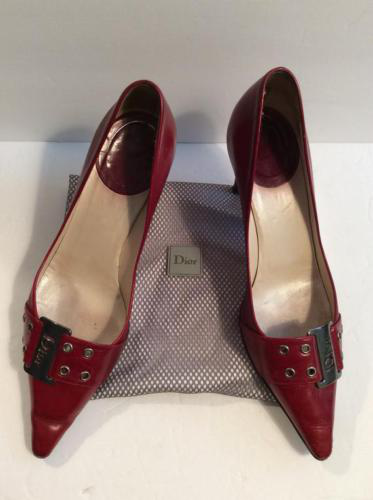

In [0]:
data.valid_ds.x[23]

In [0]:
data.valid_ds.x.items[23]

PosixPath('escarpins/Dior/00000118.jpg')